Tarefa: Utilizar Machine Learning para classificar Pokemons no tipo primário - Grama, Fogo etc. - dado seus atributos.

Importando Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import shuffle

Leitura do dataset

In [2]:
csv_path = "Pokemon.csv"
df = pd.read_csv(csv_path)
df.head() #mostra as 5 primeiras linhas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Criar uma categoria numérica para o tipo secundário

In [3]:

# Create a label (category) encoder object

df.replace(np.NaN, "sem" , inplace = True)
le = preprocessing.LabelEncoder()
le.fit(df['Type 2'])
list(le.classes_)
x2 = le.transform(df['Type 2'])
df['Tipo2'] = x2
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Tipo2
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,13
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,13
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,13
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,13
4,4,Charmander,Fire,sem,309,39,52,43,60,50,65,1,False,18


Embaralhar o dataset

In [4]:
df = df.sample(frac=1)
#df = shuffle(df)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Tipo2
428,386,DeoxysNormal Forme,Psychic,sem,600,50,150,50,150,50,150,3,True,18
358,327,Spinda,Normal,sem,360,60,60,60,60,60,60,3,False,18
398,363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False,17
91,84,Doduo,Normal,Flying,310,35,85,45,35,35,75,1,False,7
148,137,Porygon,Normal,sem,395,65,60,70,85,75,40,1,False,18


In [5]:
y = np.array(df['Type 1'])
x = np.array(df.drop(['Name', 'Type 1', 'Type 2'], axis = 1).astype(int))


In [6]:
#selecionar dados de treino e de teste
x_treino = x[0:700]
y_treino = y[0:700]
x_teste = x[700:800]
y_teste = y[700:800]

In [7]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_teste)
y_true = y_teste
accuracy_score(y_true, y_pred)

0.13

In [8]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(x_treino, y_treino)
y_pred = clf.predict(x_teste)
y_true = y_teste
accuracy_score(y_true, y_pred)

0.23999999999999999

In [9]:

#Support vector Machine
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(x_treino, y_treino) 
y_pred = clf.predict(x_teste)
y_true = y_teste
accuracy_score(y_true, y_pred)

0.27000000000000002

Tarefa difícil com as Técnicas simples de Machine Learning pois não há muita correlação entre o tipo e os pontos de atributo. Talvez com deep neural networks os resultados melhorem.

...

Algumas análises exploratórias:

In [10]:
#acrescentando uma coluna numérica para o tipo primário
df.replace(np.NaN, "Tipo" , inplace = True)
le = preprocessing.LabelEncoder()
le.fit(df['Type 1'])
list(le.classes_)
x2 = le.transform(df['Type 1'])
df['Tipo'] = x2
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Tipo2,Tipo
428,386,DeoxysNormal Forme,Psychic,sem,600,50,150,50,150,50,150,3,True,18,14
358,327,Spinda,Normal,sem,360,60,60,60,60,60,60,3,False,18,12
398,363,Spheal,Ice,Water,290,70,40,50,55,50,25,3,False,17,11
91,84,Doduo,Normal,Flying,310,35,85,45,35,35,75,1,False,7,12
148,137,Porygon,Normal,sem,395,65,60,70,85,75,40,1,False,18,12


In [11]:
#acrescentando hot labels para cada tipo
dummy_variable_1 = pd.get_dummies(df["Type 1"])
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
428,386,DeoxysNormal Forme,Psychic,sem,600,50,150,50,150,50,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
358,327,Spinda,Normal,sem,360,60,60,60,60,60,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
398,363,Spheal,Ice,Water,290,70,40,50,55,50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
91,84,Doduo,Normal,Flying,310,35,85,45,35,35,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
148,137,Porygon,Normal,sem,395,65,60,70,85,75,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Tipos primários

In [12]:

Tipos = list(le.classes_)
for i, k in enumerate (Tipos):
    print(i, k)
Tipos

0 Bug
1 Dark
2 Dragon
3 Electric
4 Fairy
5 Fighting
6 Fire
7 Flying
8 Ghost
9 Grass
10 Ground
11 Ice
12 Normal
13 Poison
14 Psychic
15 Rock
16 Steel
17 Water


['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

Tipo 2 (Dragão) se sobressai no total de pontos

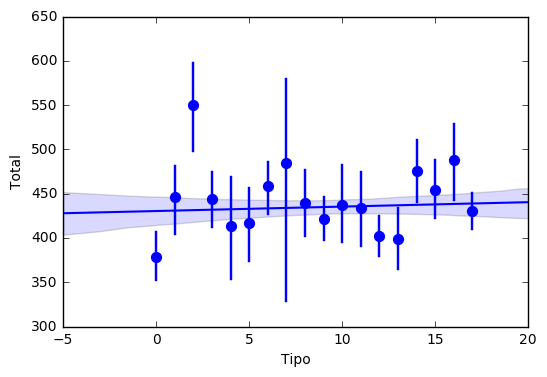

In [13]:
sns.regplot(x="Tipo", y ="Total", data = df, x_estimator=np.mean, )

Tipos 15 e 16 (Rock e Steel) possuem defesa média muito maior que a média dos outros tipos

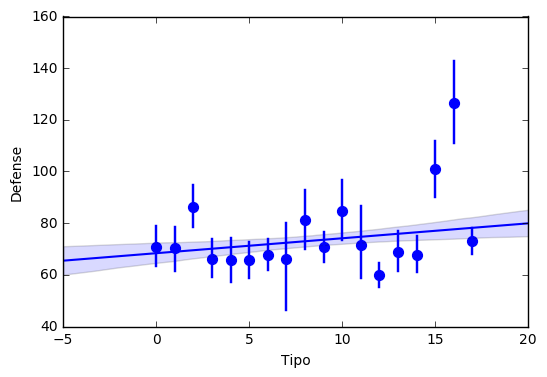

In [14]:
sns.regplot(x="Tipo", y ="Defense", data = df, x_estimator=np.mean)

            Steel   Defense
Steel    1.000000  0.315013
Defense  0.315013  1.000000
             Rock   Defense
Rock     1.000000  0.184824
Defense  0.184824  1.000000
            Rock  Defense
Rock     1.00000  0.20865
Defense  0.20865  1.00000
             Rock   Defense
Rock     1.000000  0.153278
Defense  0.153278  1.000000


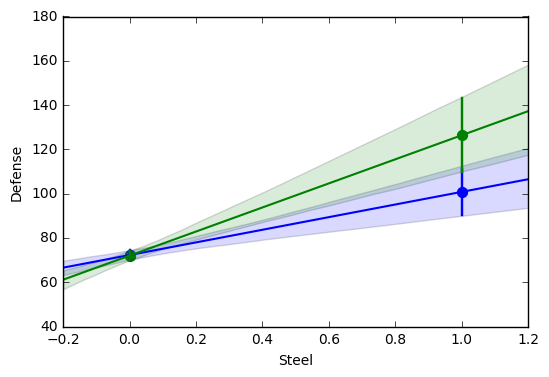

In [15]:
sns.regplot(x="Rock", y ="Defense", data = df, x_estimator=np.mean)
sns.regplot(x="Steel", y ="Defense", data = df, x_estimator=np.mean)
#sns.regplot(x="Steel", y ="Defense", data = df, x_jitter=.1)
print(df[["Steel", "Defense"]].corr())
print(df[["Rock", "Defense"]].corr('spearman'))
print(df[["Rock", "Defense"]].corr('pearson'))
print(df[["Rock", "Defense"]].corr('kendall'))

In [16]:
#media dos tipos para cada atributo
df.groupby(by="Tipo").mean()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Tipo,,,,,,,,,,,,,,,,,,,,,
0,334.492754,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,3.217391,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,461.354839,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,4.032258,0.064516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,474.375000,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,3.875000,0.375000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,363.500000,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,3.272727,0.090909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,363.851852,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,3.370370,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,327.403846,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,3.211538,0.096154,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,677.750000,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,5.500000,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,486.500000,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,4.187500,0.062500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
#tabela de correlações
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396,...,0.121257,-0.026684,-0.006404,0.051293,-0.078311,-0.101553,0.023936,0.034660,0.071842,-0.115733
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758,...,0.007594,-0.036057,0.004082,-0.002412,-0.104150,-0.057123,0.094364,0.037524,0.082000,-0.015640
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620,...,-0.038565,-0.024116,0.036175,0.018891,0.117377,-0.014991,0.014900,-0.036824,-0.029563,0.044330
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408,...,-0.032849,-0.055245,0.105399,-0.033892,-0.063720,-0.025379,-0.064427,0.103101,0.078949,-0.060321
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377,...,0.048110,-0.030232,0.072058,-0.013689,-0.167796,-0.030684,-0.054733,0.208650,0.315013,-0.011601
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907,...,0.040721,0.044316,-0.102064,0.025392,-0.194274,-0.072164,0.216686,-0.069929,-0.030298,0.024583
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937,...,0.033514,-0.016411,-0.067175,0.027754,-0.109867,-0.051424,0.143193,0.031009,0.058646,-0.020088
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715,...,-0.027648,-0.067695,-0.030723,-0.029182,0.042114,-0.030860,0.126019,-0.102742,-0.083775,-0.032137
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794,...,0.106196,0.006228,-0.020594,0.023083,-0.061377,-0.090395,0.010379,0.019006,0.059448,-0.113395
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000,...,-0.014008,-0.043514,0.032686,0.001341,-0.083203,-0.056635,0.166625,0.008529,0.045761,-0.067244


In [18]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Tipo2,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,13.235000,...,0.040000,0.087500,0.040000,0.030000,0.122500,0.035000,0.071250,0.055000,0.033750,0.140000
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,5.595213,...,0.196082,0.282743,0.196082,0.170694,0.328068,0.183895,0.257403,0.228123,0.180698,0.347204
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,16.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,18.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,18.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
